In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
from ast import literal_eval
import test_plot
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cosine, euclidean
from candlestick import CandleStick

In [2]:
df = pd.read_csv('test_set.csv')

In [3]:
meta = df.pop('meta')

In [4]:
df = df.applymap(literal_eval)

In [5]:
df = df.applymap(lambda x: CandleStick(x[0], x[1], x[2], x[3]))

In [7]:
test = df.iloc[0, 0]
print type(test)

<class 'candlestick.CandleStick'>


In [8]:
df.shape

(2444, 85)

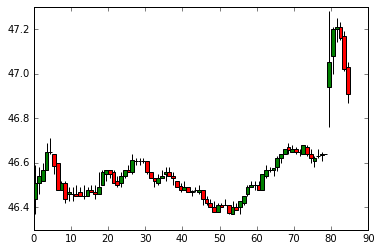

In [9]:
# Lets look at one
random = df.iloc[543, : ]
first = df.iloc[615, : ]
second = df.iloc[1876, : ]
fig1, ax1 = plt.subplots()
test_plot.build_candle_chart(fig1, ax1, random)

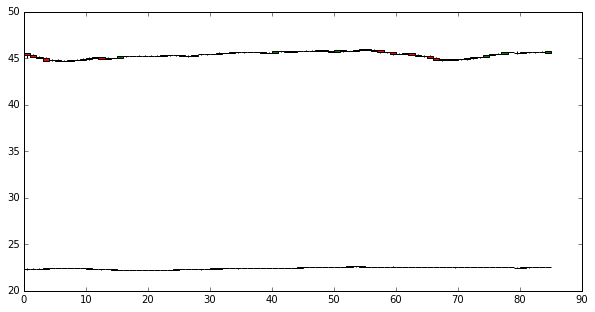

In [10]:
fig2, ax2 = plt.subplots(figsize=(10,5))
test_plot.build_candle_chart(fig2, ax2, first)
test_plot.build_candle_chart(fig2, ax2, second)

Need to find a way normalize this data

In [17]:
test_row = df.iloc[543, : ]
print test_row[78]

Open: 46.64, High: 46.64, Low: 46.64, Close: 46.64


In [11]:
test_row = df.iloc[543, : ]
top = max([max(candle) for candle in test_row.values])
bot = min([min(candle) for candle in test_row.values])

test = [[round((num-bot)*100/(top-bot), 4) for num in candle] for candle in test_row.values]
normed = pd.Series(test)

AttributeError: 'list' object has no attribute 'open_price'

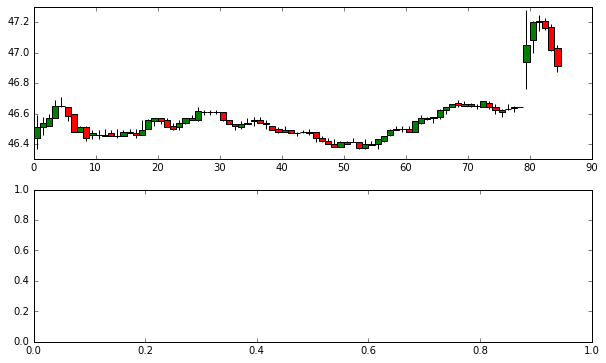

In [12]:
fig, axes = plt.subplots(2, figsize=(10,6))
test_plot.build_candle_chart(fig, axes[0], test_row)
test_plot.build_candle_chart(fig, axes[1], normed)

In [42]:
def norm_candles(raw):
    top = max([max(candle) for candle in raw.values])
    bot = min([min(candle) for candle in raw.values])
    test = [[round((num-bot)*100/(top-bot), 4) for num in candle] for candle in raw.values]
    normed = pd.Series(test)
    return normed

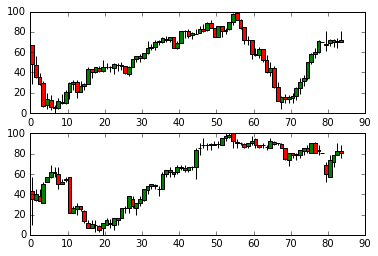

In [43]:
fig, axes = plt.subplots(2)
test_plot.build_candle_chart(fig, axes[0], norm_candles(first))
test_plot.build_candle_chart(fig, axes[1], norm_candles(second))

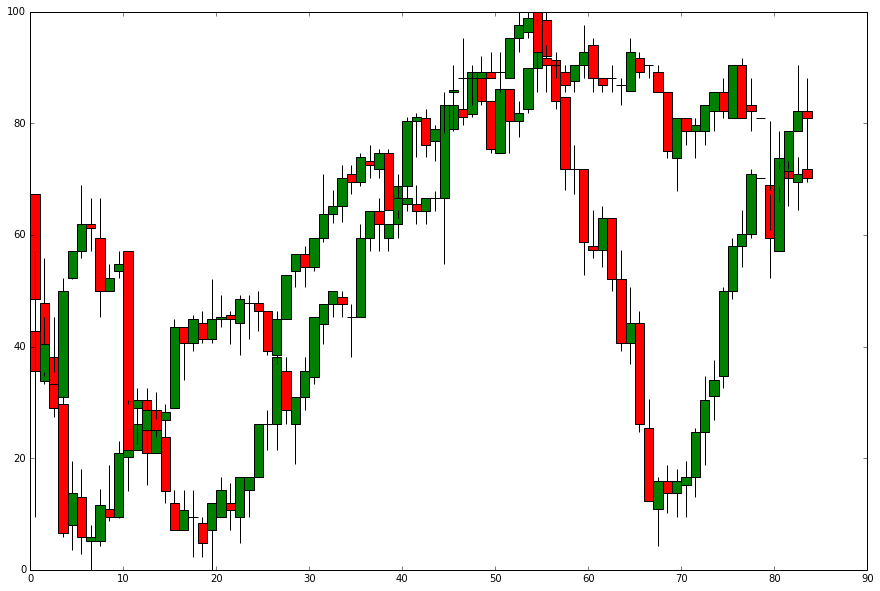

In [44]:
fig, ax = plt.subplots(figsize=(15,10))
first = norm_candles(first)
second = norm_candles(second)
test_plot.build_candle_chart(fig, ax, first[:])
test_plot.build_candle_chart(fig, ax, second[:])

Ok -- Now need some sort of distance metric

In [45]:
cand1 = first[0] # both red, a gap between
cand2 = second[0]
cand3 = first[1] # red and green overlapping
cand4 = second[1]
cand5 = first[2] # red red no gap
cand6 = second[2]
cand7 = first[3] #big gap different colors
cand8 = second[3]
print cand1, cand2
print cand3, cand4
# open high low close

[67.3937, 67.3937, 28.2661, 48.5545] [42.8571, 57.1429, 9.5238, 35.7143]
[47.8299, 55.8003, 34.7873, 35.5119] [33.8095, 45.2381, 33.3333, 40.4762]


In [46]:
print cosine(cand1, cand2)
print cosine(cand3, cand4)
print cosine(cand5, cand6)
print cosine(cand7, cand8)

0.0174528597995
0.0145417200791
0.000959049595429
0.177410591857


In [47]:
print euclidean(cand1, cand2)
print euclidean(cand3, cand4)
print euclidean(cand5, cand6)
print euclidean(cand7, cand8)

34.9752510431
18.3000020626
9.94881668843
54.533413096


In [51]:
test1 = [5,15,18,21]
test2 = [10, 20, 23, 26]
print cosine(test1, test2)
print cosine([point - min(test1) for point in ])

0.00419091789165


In [48]:
def average_candles(plot1, plot2):
    
    
    
    
    
def norm_candles(raw):
    top = max([max(candle) for candle in raw.values])
    bot = min([min(candle) for candle in raw.values])
    test = [[round((num-bot)*100/(top-bot), 4) for num in candle] for candle in raw.values]
    normed = pd.Series(test)
    return normed
    

IndentationError: expected an indented block (<ipython-input-48-fbacf8c95a8f>, line 7)

In [ ]:
test = zip(first.values,  second.values)[0]
zip(test[0], test[1])

In [ ]:
np.mean([5,6])